In [1]:
'''
HW2
'''
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def update_x(x, xnew):
    if len(x)>1:
        y = np.zeros(len(x))
        y[0] = x[1]
        y[1] = xnew
    else:
        y = [xnew]
    return y
    
def Iterative(method, f, x, other_params={}, tol=1e-5, maxit=100, verbose=False, print_res=True):
    itcnt = 0
    conv = False
    lenx = len(x)
    X = np.zeros(maxit+lenx)
    if len(x)>1:
        X[0:2] = x
    else:
        X[0] = x[-1]
    while True:
        x_next, val = method(f, x, other_params)
        # x_next = list of points for the next iteration
        # val = x_next as a scalar
        itcnt += 1
        X[itcnt+lenx-1] = val # record
        if verbose:
            print( f"#it = {itcnt:3d} : x = {val:.8f}")

        # evaluate stopping condition (converged?)
        if "sol" in other_params: # if sol is given
            conv = (np.abs(val - other_params["sol"]) < tol)
        else: # default
            if lenx>1:
                conv = (np.abs(x_next[1]-x_next[0]) < tol)
            else:
                conv = (np.abs(x_next[0] - x[0]) < tol)
        if conv:
            break

        # check if itcnt exceeded the max iteration limit
        if itcnt >= maxit:
            break

        # update x
        x = x_next
    X = X[:itcnt+lenx] # chop X
    if print_res:
        print(f"conv? = {conv}, #it = {itcnt:3d}, x = {val}")
    return X, conv

def Newton(f, x, params):
    x = x[0] # given as a list/array
    x_next = x - f(x)/params["df"](x) 
    return [x_next], x_next # return as a list

def Bisection(f, x, params):
    a = x[0]
    b = x[1]
    c =np.sum(x)/2.0
    if f(a)*f(c)<0:
        return [a, c], c
    else:
        return [c, b], c

def Secant(f, x, params):
    a = x[0] # x_{k-1}
    b = x[1] # x_k
    c = b - f(b)*(b-a)/(f(b)-f(a))
    return [b, c], c # [x_k, x_{k+1}]

def plot_Errors(X, sol, label):
    X = np.abs(X-sol)
    plt.plot(X, label=label)
    plt.yscale('log')

conv? = True, #it =   4, x = 1.2599218605659261
conv? = True, #it =  18, x = 1.2599258422851562


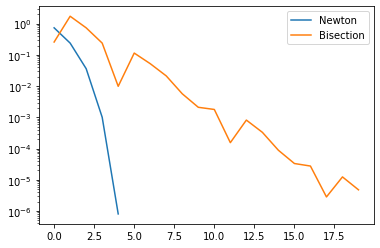

In [8]:
### Problem 1 ###

f = lambda x: x**3-2
df = lambda x: 3*x**2
sol = 2**(1/3)
x0 = 2
X_Newton, _ = Iterative(Newton, f, x = [x0], other_params={"sol":sol, "df": df}, verbose=False)
X_Bisection, _ = Iterative(Bisection, f, x = [1, 3], verbose=False)
plot_Errors(X_Newton, sol, "Newton")
plot_Errors(X_Bisection, sol, "Bisection")
plt.legend();

conv? = True, #it =   8, x = -0.8654740331019471
1.0009770790020411e-12


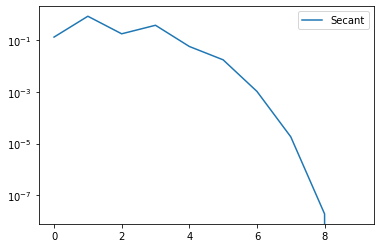

In [4]:
### Problem 2 ###
   
f = lambda x: -x**3-np.cos(x)
p0 = -1
p1 = 0
X_Secant, conv = Iterative(Secant, f, x=[p0, p1], tol = 1e-7, verbose=False) # tol<0 --> force run max iterations
print( f(X_Secant[-1]) )
if conv:
    sol = X_Secant[-1]
plot_Errors(X_Secant, sol, "Secant")
plt.legend();        

Bisection:
conv? = True, #it =  37, x = -0.7390851331729209
Secant:
conv? = True, #it =   8, x = -0.7390851332151607
Newton (x0 = a):
conv? = True, #it =  21, x = -0.7390851332151607
Newton (x0 = b):
conv? = False, #it = 100, x = 3209575491844012.0
Newton (x0 = (a+b)/2):
conv? = True, #it =   5, x = -0.7390851332151607


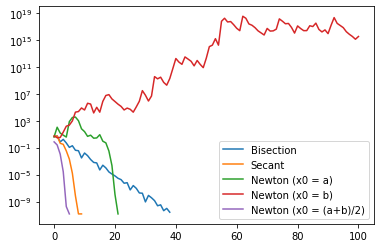

In [5]:
### Problem 3 ###
f = lambda x: x+np.cos(x)
df = lambda x: 1-np.sin(x)
sol = -0.7390851332
x = [-5, 5]
print( "Bisection:")
X_B, conv = Iterative(Bisection, f, x, tol=1e-10)
print( "Secant:")
X_S, _ = Iterative(Secant, f, x, tol=1e-10)
print( "Newton (x0 = a):") # x0 = a

params = {"sol":sol, "df":df}

X_Na, _ = Iterative(Newton, f, x=[x[0]], other_params = params, tol=1e-10)
print( "Newton (x0 = b):") # x0 = b
X_Nb, _ = Iterative(Newton, f, x=[x[1]], other_params = params, tol=1e-10)
print( "Newton (x0 = (a+b)/2):" ) # x0 = (a+b)/2
X_Nc, _ = Iterative(Newton, f, x=[sum(x)/2], other_params = params, tol=1e-10)

plot_Errors(X_B, sol, 'Bisection')
plot_Errors(X_S, sol, 'Secant')
plot_Errors(X_Na, sol, 'Newton (x0 = a)')
plot_Errors(X_Nb, sol, 'Newton (x0 = b)')
plot_Errors(X_Nc, sol, 'Newton (x0 = (a+b)/2)')
plt.legend();

#it =   1 : x = 1.69230769
#it =   2 : x = 1.47511312
#it =   3 : x = 1.32364493
#it =   4 : x = 1.21915491
#it =   5 : x = 1.14772424
#it =   6 : x = 1.09924127
#it =   7 : x = 1.06651021
#it =   8 : x = 1.04449927
#it =   9 : x = 1.02973810
#it =  10 : x = 1.01985773
#it =  11 : x = 1.01325296
#it =  12 : x = 1.00884177
#it =  13 : x = 1.00589740
#it =  14 : x = 1.00393288
#it =  15 : x = 1.00262250
#it =  16 : x = 1.00174858
#it =  17 : x = 1.00116584
#it =  18 : x = 1.00077727
#it =  19 : x = 1.00051821
#it =  20 : x = 1.00034548
#it =  21 : x = 1.00023032
#it =  22 : x = 1.00015355
#it =  23 : x = 1.00010237
#it =  24 : x = 1.00006825
#it =  25 : x = 1.00004551
#it =  26 : x = 1.00003034
#it =  27 : x = 1.00002021
#it =  28 : x = 1.00001332
#it =  29 : x = 1.00000942
conv? = True, #it =  29, x = 1.0000094223758367


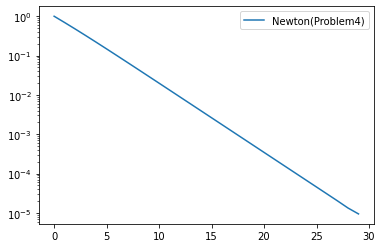

In [6]:
### Problem 4 ###
f = lambda x: x**4-x**3-3*x**2+5*x-2
df = lambda x: 4*x**3-3*x**2-6*x+5
sol = 1.
params = {"sol":sol, "df": df}
X, _ = Iterative(Newton, f, x=[2], other_params = params, maxit = 50, tol=1e-5, verbose=True)
plot_Errors(X, sol, 'Newton(Problem4)')
plt.legend();

conv? = True, #it =  22, x = 1.124120456006366
conv? = False, #it = 100, x = 0.9305547315268293
conv? = True, #it =   8, x = 1.1241211111103167
conv? = True, #it =   4, x = 1.124123029704334


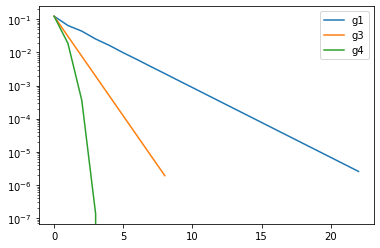

In [11]:
### Problem 7 ###

def Fixed_Point(f, x, params):
    x = x[0]
    x_next = f(x)
    return [x_next], x_next

x0 = 1
g1 = lambda x: (3+x-2*x**2)**(1/4)
g2 = lambda x: ((x+3-x**4)/2)**(1/2)
g3 = lambda x: ((x+3)/(x*x+2))**(1/2)
g4 = lambda x: (3*x**4+2*x**2+3)/(4*x**3+4*x-1) # Newton's method

verbose = False
X1, _ = Iterative(Fixed_Point, g1, [x0], verbose=verbose)
X2, _ = Iterative(Fixed_Point, g2, [x0], verbose=verbose)
X3, _ = Iterative(Fixed_Point, g3, [x0], verbose=verbose)
X4, _ = Iterative(Fixed_Point, g4, [x0], verbose=verbose)
sol = X4[-1]
plot_Errors(X1, sol, "g1")
plot_Errors(X2, sol, "g2")
plot_Errors(X3, sol, "g3")
plot_Errors(X4, sol, "g4")
plt.legend();